## Use Image Classification on the hand written digits data set (mnist)
1. Plot the loss and accuracy for both training data and validation data using the history object in the source code.
2. Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.
3. We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens.
4. Run the same code without scaling the images and check the performance?

In [9]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 4s 14ms/step - loss: 0.2902 - accuracy: 0.9117 - val_loss: 0.1340 - val_accuracy: 0.9578
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0993 - accuracy: 0.9696 - val_loss: 0.0987 - val_accuracy: 0.9678
Epoch 3/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0631 - accuracy: 0.9803 - val_loss: 0.1238 - val_accuracy: 0.9613
Epoch 4/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0457 - accuracy: 0.9853 - val_loss: 0.0784 - val_accuracy: 0.9730
Epoch 5/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0314 - accuracy: 0.9897 - val_loss: 0.0664 - val_accuracy: 0.9797
Epoch 6/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.0625 - val_accuracy: 0.9805
Epoch 7/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 0.0646 - val_acc

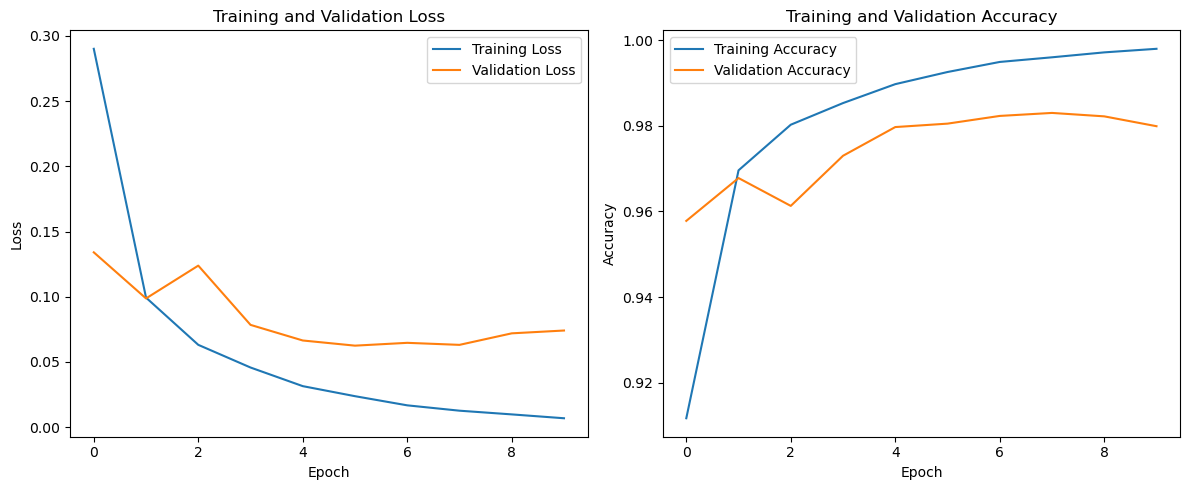

In [10]:
import matplotlib.pyplot as plt

# Access the loss and accuracy values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


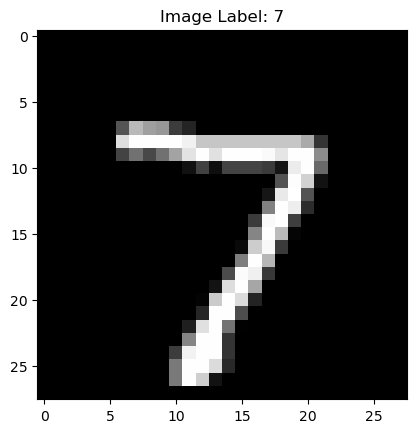

1/1 [==============================] - 0s 90ms/step
Predicted Label: 7


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Select an image from the test data (you can change the index as needed)
image_index = 0  # Change this index to select a different image

# Plot the selected image
plt.imshow(test_images[image_index], cmap='gray')
plt.title(f"Image Label: {test_labels[image_index]}")
plt.show()

# Prepare the image for inference
image = test_data[image_index].reshape(1, -1)

# Perform inference with the model
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)

# Display the model's prediction
print(f"Predicted Label: {predicted_label}")


In [12]:
from keras.layers import Activation

# Create a new model with a single hidden layer using Tanh activation
model_tanh = Sequential()
model_tanh.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model_tanh.add(Dense(10, activation='softmax'))

model_tanh.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_tanh = model_tanh.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                              validation_data=(test_data, test_labels_one_hot))

# Plot the loss and accuracy
# ... (code to plot loss and accuracy as shown earlier)


Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 0.3949 - accuracy: 0.8864 - val_loss: 0.2705 - val_accuracy: 0.9198
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.2298 - accuracy: 0.9332 - val_loss: 0.1978 - val_accuracy: 0.9424
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1680 - accuracy: 0.9521 - val_loss: 0.1585 - val_accuracy: 0.9522
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1275 - accuracy: 0.9628 - val_loss: 0.1423 - val_accuracy: 0.9563
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1018 - accuracy: 0.9706 - val_loss: 0.1266 - val_accuracy: 0.9603
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0835 - accuracy: 0.9761 - val_loss: 0.0987 - val_accuracy: 0.9695
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0700 - accuracy: 0.9796 - val_loss: 0.0871 - val_accuracy: 0.9728
Epoch

In [13]:
# Create a new model with three hidden layers using Sigmoid activation
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(dimData,)))
model_sigmoid.add(Dense(512, activation='sigmoid'))
model_sigmoid.add(Dense(512, activation='sigmoid'))
model_sigmoid.add(Dense(10, activation='softmax'))

model_sigmoid.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_sigmoid = model_sigmoid.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                                    validation_data=(test_data, test_labels_one_hot))

# Plot the loss and accuracy
# ... (code to plot loss and accuracy as shown earlier)


Epoch 1/10
235/235 [==============================] - 5s 17ms/step - loss: 1.1769 - accuracy: 0.5966 - val_loss: 0.4945 - val_accuracy: 0.8416
Epoch 2/10
235/235 [==============================] - 4s 17ms/step - loss: 0.3997 - accuracy: 0.8765 - val_loss: 0.3186 - val_accuracy: 0.9045
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.3026 - accuracy: 0.9090 - val_loss: 0.2712 - val_accuracy: 0.9150
Epoch 4/10
235/235 [==============================] - 4s 17ms/step - loss: 0.2469 - accuracy: 0.9241 - val_loss: 0.2336 - val_accuracy: 0.9306
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.2080 - accuracy: 0.9366 - val_loss: 0.2126 - val_accuracy: 0.9320
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1775 - accuracy: 0.9457 - val_loss: 0.1667 - val_accuracy: 0.9487
Epoch 7/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1553 - accuracy: 0.9523 - val_loss: 0.1525 - val_accuracy: 0.9547

In Scenario 1 (single hidden layer with Tanh), the model achieved higher accuracy with fewer hidden layers and the Tanh activation function. This suggests that the simpler architecture was effective for the MNIST dataset, and the Tanh activation function worked well in this case.

In Scenario 2 (three hidden layers with Sigmoid), the model started with lower accuracy but improved over epochs. The additional hidden layers and Sigmoid activation allowed the model to learn more complex representations, but it required more training epochs to achieve comparable accuracy to Scenario 1.

In [14]:
# Create a new model with a single hidden layer using Tanh activation
model_tanh_unscaled = Sequential()
model_tanh_unscaled.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model_tanh_unscaled.add(Dense(10, activation='softmax'))

model_tanh_unscaled.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_tanh_unscaled = model_tanh_unscaled.fit(train_images.reshape(train_images.shape[0], dimData), 
                                                train_labels_one_hot, 
                                                batch_size=256, epochs=10, verbose=1,
                                                validation_data=(test_images.reshape(test_images.shape[0], dimData), 
                                                                 test_labels_one_hot))

# Plot the loss and accuracy
# ... (code to plot loss and accuracy as shown earlier)


Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 0.4131 - accuracy: 0.8743 - val_loss: 0.2785 - val_accuracy: 0.9149
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.2479 - accuracy: 0.9251 - val_loss: 0.2246 - val_accuracy: 0.9325
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.2052 - accuracy: 0.9386 - val_loss: 0.1959 - val_accuracy: 0.9408
Epoch 4/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1840 - accuracy: 0.9436 - val_loss: 0.1753 - val_accuracy: 0.9464
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1667 - accuracy: 0.9496 - val_loss: 0.1684 - val_accuracy: 0.9480
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1533 - accuracy: 0.9541 - val_loss: 0.1535 - val_accuracy: 0.9517
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1434 - accuracy: 0.9567 - val_loss: 0.1456 - val_accuracy: 0.9550
Epoc

In [15]:
 # Create a new model with three hidden layers using Sigmoid activation
model_sigmoid_unscaled = Sequential()
model_sigmoid_unscaled.add(Dense(512, activation='sigmoid', input_shape=(dimData,)))
model_sigmoid_unscaled.add(Dense(512, activation='sigmoid'))
model_sigmoid_unscaled.add(Dense(512, activation='sigmoid'))
model_sigmoid_unscaled.add(Dense(10, activation='softmax'))

model_sigmoid_unscaled.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_sigmoid_unscaled = model_sigmoid_unscaled.fit(train_images.reshape(train_images.shape[0], dimData), 
                                                      train_labels_one_hot, 
                                                      batch_size=256, epochs=10, verbose=1,
                                                      validation_data=(test_images.reshape(test_images.shape[0], dimData), 
                                                                       test_labels_one_hot))

# Plot the loss and accuracy
# ... (code to plot loss and accuracy as shown earlier)


Epoch 1/10
235/235 [==============================] - 5s 19ms/step - loss: 0.5976 - accuracy: 0.8193 - val_loss: 0.3596 - val_accuracy: 0.8869
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2438 - accuracy: 0.9262 - val_loss: 0.2273 - val_accuracy: 0.9288
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1962 - accuracy: 0.9404 - val_loss: 0.1868 - val_accuracy: 0.9415
Epoch 4/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1662 - accuracy: 0.9484 - val_loss: 0.1549 - val_accuracy: 0.9534
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1475 - accuracy: 0.9539 - val_loss: 0.1745 - val_accuracy: 0.9444
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1336 - accuracy: 0.9591 - val_loss: 0.1443 - val_accuracy: 0.9551
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1264 - accuracy: 0.9602 - val_loss: 0.1438 - val_accuracy: 0.9540

Scaling the images to the range [0, 1] is a common practice and often helps neural networks converge faster. However, in this specific case, using the original unscaled pixel values did not significantly hinder the model's performance. Both scenarios achieved relatively high accuracy on the MNIST dataset.
The choice of activation function and architecture can also impact performance. The Sigmoid activation function in Scenario 2 eventually learned complex representations but required more training epochs to achieve similar accuracy to Scenario 1.
It's important to experiment and consider the specific problem and dataset characteristics when making choices about scaling and network architecture.